In [119]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="pastel")
from collections import Counter
from itertools import combinations
import bitermplus as btm
import tmplot as tmp
import re
import tweepy
import requests
import numpy as np
import matplotlib.dates as md
import os
import datetime
from statistics import mean
import numpy as np
import statistics
from statsmodels.tsa.stattools import adfuller

In [2]:
work_dir = "C:/Users/fabia/OneDrive - Otto-Friedrich-Universität Bamberg/Master/Masterarbeit/Data/Twitter"

In [3]:
tweets_df = pd.read_csv(work_dir + "/all_tweets.csv")

In [4]:
print(tweets_df.shape)

(48278, 5)


In [5]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')


In [6]:
tweets_df = tweets_df[(tweets_df['date'] > "2020-07-07")]

In [7]:
print(tweets_df.shape)
print(tweets_df["tweet"])

(23761, 5)
0        @kkklawitter @EggMarkus @sepp_reitberger Das e...
1        amperio GmbH: mobileeee und amperio starten la...
2        Zur Ladeinfrastruktur für Elektrofahrzeuge geh...
3        @chris_pyak @JRehborn @HerrPhteven Dazu noch n...
4        @Mingiam10 @kkklawitter Mein Punkt ist ja der ...
                               ...                        
23756    ARD-Reporter Alexander Noodt - E-Auto.\nE-Säul...
23757    @BekkenkMarkus @BSerpent86 @Tulubay1 @KroegerO...
23758    @mr_calico @mulberry2nd @ZoePionierin In der W...
23759    @drandreaskruger #Mercedes usf. warten auf den...
23760    @drandreaskruger Schön in der Doku zu sehen, w...
Name: tweet, Length: 23761, dtype: object


In [8]:
# calculate Tweet sentiment

analyzer = SentimentIntensityAnalyzer()
def calculate_sentiment(dataframe):
    utf_encoded = dataframe["tweet"].encode('utf-16', 'surrogatepass').decode('utf-16')
    vs = analyzer.polarity_scores(utf_encoded)
    neg_list.append(vs["neg"])
    neu_list.append(vs["neu"])
    pos_list.append(vs["pos"])
    com_list.append(vs["compound"])
    return dataframe

In [9]:
neg_list = []
neu_list = []
pos_list = []
com_list = []
tweets_df = tweets_df.apply(lambda x: calculate_sentiment(x), axis=1)

In [10]:
tweets_df["negative"] = neg_list
tweets_df["neutral"] = neu_list
tweets_df["positive"] = pos_list
tweets_df["compound"] = com_list

In [11]:
print(tweets_df)

       Unnamed: 0                      date             user  \
0               0 2022-04-26 08:44:26+00:00   ReinerKurzmann   
1               1 2022-04-26 08:44:03+00:00  na_presseportal   
2               2 2022-04-26 08:40:02+00:00     SmartHomeEU1   
3               3 2022-04-26 08:32:54+00:00       EPhisoloph   
4               4 2022-04-26 08:26:51+00:00           Amie42   
...           ...                       ...              ...   
23756       23756 2020-07-07 05:40:36+00:00          BrutDes   
23757       23757 2020-07-07 05:09:42+00:00         4e657264   
23758       23758 2020-07-07 04:18:55+00:00     DSchrombgens   
23759       23759 2020-07-07 00:20:19+00:00   ArnoldSchiller   
23760       23760 2020-07-07 00:18:26+00:00   ArnoldSchiller   

                                                   tweet  \
0      @kkklawitter @EggMarkus @sepp_reitberger Das e...   
1      amperio GmbH: mobileeee und amperio starten la...   
2      Zur Ladeinfrastruktur für Elektrofahrzeuge g

In [12]:
def assign_sentiment(row):
    float_compound = float(row['compound'])
    if float_compound >= 0.05:
        val = 'Positive'
    elif float_compound <= -0.05:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val

In [13]:
tweets_df['sentiment'] = tweets_df.apply(assign_sentiment, axis=1)

In [14]:
tweet_sentiment = tweets_df.groupby(['sentiment']).size()

positive = tweet_sentiment['Positive']
neutral = tweet_sentiment['Neutral']
negative = tweet_sentiment['Negative']

labels = ['Positive', 'Neutral', 'Negative' ]
sentiment_count = [positive, neutral, negative]

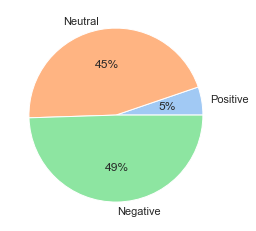

In [15]:
plt.pie(sentiment_count, labels = labels, autopct='%.0f%%')
plt.show()

In [16]:
print(tweets_df["user"])

0         ReinerKurzmann
1        na_presseportal
2           SmartHomeEU1
3             EPhisoloph
4                 Amie42
              ...       
23756            BrutDes
23757           4e657264
23758       DSchrombgens
23759     ArnoldSchiller
23760     ArnoldSchiller
Name: user, Length: 23761, dtype: object


In [20]:
unique_users = tweets_df["user"].unique()

user_df = pd.DataFrame(unique_users, columns = ['users'])

follower_count = []

for user in unique_users:
    str_user = str(user)
    request_link = "https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names="+str_user
    
    try:
        request_result = requests.get(request_link).json()
    except:
        request_result = None
    
    try:
        follower = int(request_result[0]["followers_count"])
    except:
        follower = None
    
    follower_count.append(follower)

user_df["follower_count"] = follower_count

In [21]:
print(tweets_df['user'].value_counts())

SmartHomeEU1    957
ElectriveNet    688
emobicon        454
stang2k         198
news_nowgmbh    132
               ... 
matzeman          1
cantina_guy       1
PIPO1245671       1
MrVarulf          1
BrutDes           1
Name: user, Length: 9373, dtype: int64


In [22]:
print(user_df['follower_count'].sum())

46197547.0


In [23]:
user_df['follower_count'] = user_df['follower_count'].fillna('').astype(str).str.replace(".0","",regex=False)
print(user_df['follower_count'])

0        113
1       6729
2       1023
3         10
4        648
        ... 
9368     138
9369    3583
9370     148
9371     229
9372      10
Name: follower_count, Length: 9373, dtype: object


In [24]:
#user_df.to_csv("users_with_followers.csv")

In [25]:
print(user_df)

                users follower_count
0      ReinerKurzmann            113
1     na_presseportal           6729
2        SmartHomeEU1           1023
3          EPhisoloph             10
4              Amie42            648
...               ...            ...
9368         haunsteg            138
9369       METRO_News           3583
9370     JoachimStais            148
9371  WilfriedGlaube2            229
9372          BrutDes             10

[9373 rows x 2 columns]


In [26]:
unique_users = user_df['users'].tolist()

In [27]:
print(len(unique_users))

split_users = np.array_split(unique_users, 100)
print(split_users[0])

9373
['ReinerKurzmann' 'na_presseportal' 'SmartHomeEU1' 'EPhisoloph' 'Amie42'
 'verkehrswendeb2' 'PTNisWarCrmnl' 'rouTfuAeiropA' 'GruenUrsula'
 'Elbeelfe' 'OxKing' 'FamagustaG' 'Baeumleschule' 'EggMarkus'
 'abbdeutschland' 'energie_rlp' 'ReegerLothar' 'skippertom3' 'manuel01St'
 'RenatoRavioli' 'joschtl' 'Redaktion_GEB' 'christianknol13'
 'mikenolte_de' 'franke_karsten' 'Acostard' 'martin_kraft' 'SaschaPPP'
 'TKornetto' 'designmobility' 'bmzimmermann' 'Andreas88730797'
 'ChPeter_AT' 'troy_mc_clure' 'TorstenGajda' 'fancyPT' 'DanielaKeusen'
 'TTinaani' 'DeTottel' 'marzlberger' 'SimonTschannett' 'MScHome'
 'cruzii1337' 'consolinno' 'Mingiam10' 'USchwart' 'xberg_edge' 'Zeitwort_'
 'DerDienstreiser' 'slaue' 'ropietsch' 'benjiButo' 'qualityofdeath'
 'mamuente' 'RaddatzWWF' 'stang2k' 'ElectriveNet' 'elektrologisch'
 'Alexand59722739' 'DominicMuenster' 'Klarname_LLL' 'FreakeyDE'
 'bremerhaven_de' 'FreieWeltEu' 'Giefers' 'CanniST448' 'FrauDoktorX'
 'derjebby' 'mainpcerlenbach' 'BaumbergOwl' 'St

In [61]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAOR%2BbwEAAAAASwiLtwOgXt%2FtG0EJIrLdaph2Xsw%3DspW7CHN0I6KBcjdy4BVvj75LpMAdgQ5l3DIkrcVWMFz8FLIHlz"

client = tweepy.Client(bearer_token, wait_on_rate_limit=True)

user_id = []
user_name = []
for chunk in split_users:
    users = ",".join(chunk)

    response = client.get_users(usernames=users)

    for user in response.data:
        user_id.append(user.id)
        user_name.append(user.username)

new_user_df = pd.DataFrame(user_id, columns = ['user_id'])
new_user_df["user_name"] = user_name

Rate limit exceeded. Sleeping for 546 seconds.


In [62]:
print(new_user_df)
print(user_df)

                  user_id        user_name
0               372243368   ReinerKurzmann
1                44894572  na_presseportal
2     1254490069299322882     SmartHomeEU1
3     1251959965209841664       EPhisoloph
4               212992615           Amie42
...                   ...              ...
9319           3075117101       chaase1337
9320             59542471     Stefan_Urbat
9321           3068639057    J_Hildermeier
9322             14829549         kamil2_0
9323           4739156727          MAZirke

[9324 rows x 2 columns]
                users follower_count
0      ReinerKurzmann            114
1     na_presseportal           6641
2        SmartHomeEU1            977
3          EPhisoloph             11
4              Amie42            598
...               ...            ...
9346       chaase1337              5
9347     Stefan_Urbat           2000
9348    J_Hildermeier            711
9349         kamil2_0           1033
9350          MAZirke            387

[9351 rows x 2

In [63]:
merged_user_df = pd.merge(user_df, new_user_df, left_on='users', right_on='user_name', how='left')

In [77]:
merged_user_df["user_id"] = merged_user_df["user_id"].astype('Int64')

In [80]:
print(merged_user_df)

     follower_count              user_id        user_name
0               114            372243368   ReinerKurzmann
1              6641             44894572  na_presseportal
2               977  1254490069299322880     SmartHomeEU1
3                11  1251959965209841664       EPhisoloph
4               598            212992615           Amie42
...             ...                  ...              ...
9346              5           3075117101       chaase1337
9347           2000             59542471     Stefan_Urbat
9348            711           3068639057    J_Hildermeier
9349           1033             14829549         kamil2_0
9350            387           4739156727          MAZirke

[9351 rows x 3 columns]


In [81]:
merged_user_df.to_csv("merged_user.csv")

In [97]:
# Topic Modelling

# Remove punctuation
tweets_df['tweet_processed'] = tweets_df['tweet'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
tweets_df['tweet_processed'] = tweets_df['tweet'].map(lambda x: x.lower())

tweets = tweets_df['tweet_processed'].str.strip().tolist()

# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
tweets_X, tweets_vocabulary, tweets_vocab_dict = btm.get_words_freqs(tweets)
tweets_tf = np.array(tweets_X.sum(axis=0)).ravel()

In [98]:
# Vectorizing documents
tweets_docs_vec = btm.get_vectorized_docs(tweets, tweets_vocabulary)
tweets_docs_lens = list(map(len, tweets_docs_vec))

In [99]:
# Generating title biterms
tweets_biterms = btm.get_biterms(tweets_docs_vec)

In [100]:
# Initializing and running titles model
def btm_model(topics, alpha, beta):
    tweets_model = btm.BTM(
        tweets_X, tweets_vocabulary, seed=12321, T=topics, M=5, alpha=alpha, beta=beta)
    tweets_model.fit(tweets_biterms, iterations=20)
    tweets_p_zd = tweets_model.transform(tweets_docs_vec)
    
    return tweets_model

def Average(l): 
    avg = sum(l) / len(l) 
    return avg

In [101]:
# Determening the number of topics by running the model with a fixed alpha = 0.01 and beta = 0.1
coherence_list = []
perplexity_list = []
# Topics range
min_topics = 2
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

for k in topics_range:
    # get the coherence score for the given parameters
    model = btm_model(k, 0.1, 0.1)
            
    perplexity = model.perplexity_
    coherence = model.coherence_
    
    coherence_list.append(Average(coherence))
    perplexity_list.append(perplexity)

100%|█████████████████████████████████████████████████████████████████████████| 23713/23713 [00:01<00:00, 20328.54it/s]


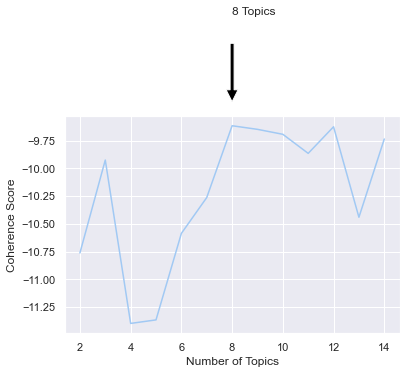

8 -9.615524489328465


In [102]:
ymax = max(coherence_list)
ymax_string = str(ymax)
xpos = coherence_list.index(ymax)
xmax = topics_range[xpos]
xmax_string = str(xmax)
plt.plot(topics_range, coherence_list)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.annotate(xmax_string + ' Topics' , xy=(xmax, ymax), xytext=(xmax, ymax+1),
            arrowprops=dict(facecolor='black', shrink=0.22),
            )
plt.show()

print(xmax, ymax)

In [103]:
# Topic parameter 
k = 8
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))

model_results = {'Alpha': [],
                 'Beta': [],
                 'Coherence': [],
                 'Perplexity': []
                }


# iterate through alpha values
for a in alpha:
    # iterare through beta values
    for b in beta:
        # get the coherence score for the given parameters
        model = btm_model(k, a, b)
            
        perplexity = model.perplexity_
        coherence = model.coherence_
            
        # Save the model results
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(Average(coherence))
        model_results['Perplexity'].append(perplexity)

100%|█████████████████████████████████████████████████████████████████████████| 23713/23713 [00:00<00:00, 24598.65it/s]


In [104]:
benchmark_df = pd.DataFrame(model_results)
print(benchmark_df)

benchmark_df.to_csv("benchmark.csv", index=False)

    Alpha  Beta  Coherence   Perplexity
0    0.01  0.01  -9.162313  3662.855913
1    0.01  0.31  -9.644494  2535.168049
2    0.01  0.61 -10.392308  2396.530163
3    0.01  0.91 -10.354925  2329.340579
4    0.31  0.01  -9.162313  3660.852523
5    0.31  0.31  -9.644494  2533.796215
6    0.31  0.61 -10.392308  2395.830157
7    0.31  0.91 -10.354925  2329.490433
8    0.61  0.01  -9.162313  3660.386199
9    0.61  0.31  -9.644494  2538.187799
10   0.61  0.61 -10.392308  2394.109076
11   0.61  0.91 -10.354925  2329.603872
12   0.91  0.01  -9.162313  3659.712782
13   0.91  0.31  -9.644494  2538.857303
14   0.91  0.61 -10.392308  2396.391753
15   0.91  0.91 -10.582920  2328.015445


In [105]:
# Choosen highest coherence with a trade-off for a higher perplexity because of a higher semantic correlation to make it easier to interpret
tweets_model = btm.BTM(
tweets_X, tweets_vocabulary, seed=12321, T=8, M=5, alpha=0.01, beta=0.01)
tweets_model.fit(tweets_biterms, iterations=20)
tweets_p_zd = tweets_model.transform(tweets_docs_vec)

100%|█████████████████████████████████████████████████████████████████████████| 23713/23713 [00:00<00:00, 33219.87it/s]


In [107]:
p_zd = tweets_model.transform(tweets_docs_vec)

100%|█████████████████████████████████████████████████████████████████████████| 23713/23713 [00:00<00:00, 24726.82it/s]


In [108]:
words_topics_df = tweets_model.df_words_topics_

words_topics_0 = pd.DataFrame(words_topics_df[0])
words_topics_0["word"] = words_topics_df.index

words_topics_1 = pd.DataFrame(words_topics_df[1])
words_topics_1["word"] = words_topics_df.index

words_topics_2 = pd.DataFrame(words_topics_df[2])
words_topics_2["word"] = words_topics_df.index

words_topics_3 = pd.DataFrame(words_topics_df[3])
words_topics_3["word"] = words_topics_df.index

words_topics_4 = pd.DataFrame(words_topics_df[4])
words_topics_4["word"] = words_topics_df.index

words_topics_5 = pd.DataFrame(words_topics_df[5])
words_topics_5["word"] = words_topics_df.index

words_topics_6 = pd.DataFrame(words_topics_df[6])
words_topics_6["word"] = words_topics_df.index

words_topics_7 = pd.DataFrame(words_topics_df[7])
words_topics_7["word"] = words_topics_df.index

                  0       word
die        0.035481        die
der        0.033102        der
und        0.027327        und
in         0.018923         in
das        0.017049        das
ladesäule  0.015758  ladesäule
an         0.014937         an
ist        0.014718        ist
mit        0.013606        mit
den        0.013583        den


[Text(0.5, 0, 'Topic 1 Word Probabilities'), Text(0, 0.5, 'Words')]

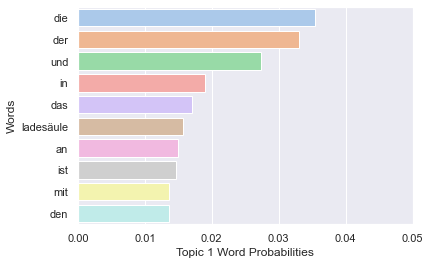

In [109]:
top_0 = words_topics_0.nlargest(10, 0)

print(top_0)
ax = sns.barplot(x=0, y="word", data=top_0)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 1 Word Probabilities', ylabel='Words')

                          1               word
die                0.040486                die
der                0.036763                der
und                0.031188                und
ladeinfrastruktur  0.021461  ladeinfrastruktur
für                0.020387                für
in                 0.019667                 in
das                0.019186                das
ist                0.012872                ist
den                0.012735                den
zu                 0.010962                 zu


[Text(0.5, 0, 'Topic 2 Word Probabilities'), Text(0, 0.5, 'Words')]

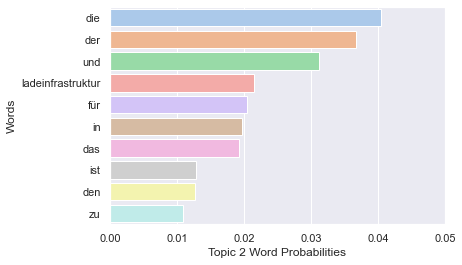

In [110]:
top_1 = words_topics_1.nlargest(10, 1)

print(top_1)
ax = sns.barplot(x=1, y="word", data=top_1)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 2 Word Probabilities', ylabel='Words')

                          2               word
der                0.040838                der
die                0.038684                die
und                0.030345                und
in                 0.029479                 in
für                0.027923                für
ladeinfrastruktur  0.023860  ladeinfrastruktur
mit                0.014543                mit
das                0.013227                das
den                0.012575                den
von                0.011236                von


[Text(0.5, 0, 'Topic 3 Word Probabilities'), Text(0, 0.5, 'Words')]

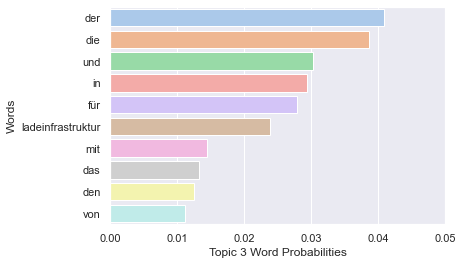

In [111]:
top_2 = words_topics_2.nlargest(10, 2)
print(top_2)
ax = sns.barplot(x=2, y="word", data=top_2)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 3 Word Probabilities', ylabel='Words')

                  3       word
die        0.031661        die
der        0.029110        der
und        0.024053        und
ladesäule  0.020017  ladesäule
das        0.017754        das
ist        0.017623        ist
nicht      0.014913      nicht
in         0.014782         in
mit        0.014507        mit
ich        0.014047        ich


[Text(0.5, 0, 'Topic 4 Word Probabilities'), Text(0, 0.5, 'Words')]

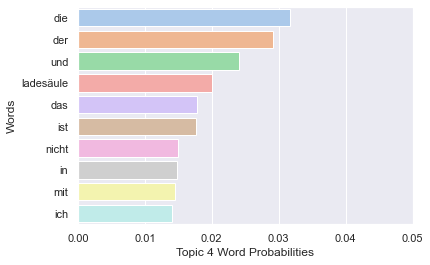

In [112]:
top_3 = words_topics_3.nlargest(10, 3)
print(top_3)
ax = sns.barplot(x=3, y="word", data=top_3)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 4 Word Probabilities', ylabel='Words')

                          4               word
der                0.044849                der
die                0.039606                die
für                0.030825                für
ladeinfrastruktur  0.026459  ladeinfrastruktur
und                0.025833                und
von                0.024992                von
mit                0.022590                mit
in                 0.020260                 in
den                0.014669                den
sie                0.012184                sie


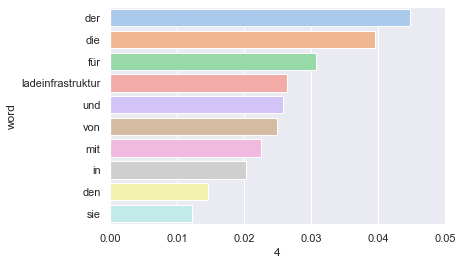

In [113]:
top_4 = words_topics_4.nlargest(10, 4)
print(top_4)
plt.xlim(0, 0.050)
ax = sns.barplot(x=4, y="word", data=top_4)

                  5       word
und        0.071728        und
der        0.061392        der
schneider  0.044862  schneider
electric   0.043861   electric
für        0.041371        für
von        0.035151        von
ein        0.030699        ein
eine       0.029212       eine
zur        0.028530        zur
gemeinsam  0.025543  gemeinsam


[Text(0.5, 0, 'Topic 5 Word Probabilities'), Text(0, 0.5, 'Words')]

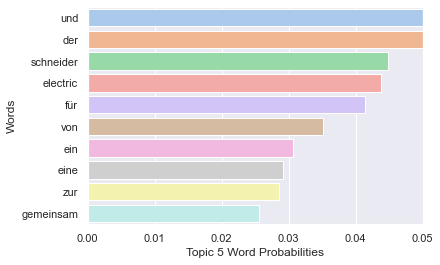

In [114]:
top_5 = words_topics_5.nlargest(10, 5)
print(top_5)
ax = sns.barplot(x=5, y="word", data=top_5)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 5 Word Probabilities', ylabel='Words')

                  6       word
ich        0.030119        ich
die        0.027114        die
ladesäule  0.025813  ladesäule
der        0.021857        der
und        0.021710        und
das        0.019559        das
nicht      0.017973      nicht
ist        0.017233        ist
es         0.014686         es
an         0.013961         an


[Text(0.5, 0, 'Topic 6 Word Probabilities'), Text(0, 0.5, 'Words')]

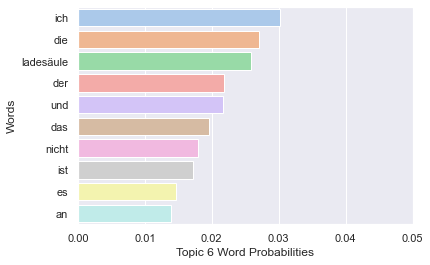

In [115]:
top_6 = words_topics_6.nlargest(10, 6)
print(top_6)
ax = sns.barplot(x=6, y="word", data=top_6)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 6 Word Probabilities', ylabel='Words')

                          7               word
die                0.040822                die
und                0.026206                und
der                0.023540                der
ladeinfrastruktur  0.017496  ladeinfrastruktur
in                 0.017156                 in
das                0.015958                das
zu                 0.015817                 zu
für                0.015171                für
es                 0.014823                 es
nicht              0.014570              nicht


[Text(0.5, 0, 'Topic 7 Word Probabilities'), Text(0, 0.5, 'Words')]

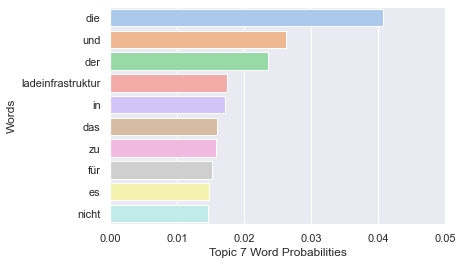

In [116]:
top_7 = words_topics_7.nlargest(10, 7)
print(top_7)
ax = sns.barplot(x=7, y="word", data=top_7)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 7 Word Probabilities', ylabel='Words')

In [117]:
top_words = btm.get_top_topic_words(
    tweets_model,
    words_num=100)


top_words_df = pd.DataFrame(top_words)
print(top_words_df.head())

top_docs = btm.get_top_topic_docs(
    tweets_df['tweet_processed'],
    p_zd,
    docs_num=3783,
    topics_idx=[0,1,2,3])

top_docs_df = pd.DataFrame(top_docs)
print(top_docs_df.head())

top_words_df.to_csv("top_words.csv", index=False)

  topic0             topic1 topic2     topic3             topic4     topic5  \
0    die                die    der        die                der        und   
1    der                der    die        der                die        der   
2    und                und    und        und                für  schneider   
3     in  ladeinfrastruktur     in  ladesäule  ladeinfrastruktur   electric   
4    das                für    für        das                und        für   

      topic6             topic7  
0        ich                die  
1        die                und  
2  ladesäule                der  
3        der  ladeinfrastruktur  
4        und                 in  
                                              topic0  \
0  entwicklungsingenieur hil-testing backend-lade...   
1  @p_humm apropos ladeinfrastruktur: schon geseh...   
2  #alphastruxure kürt #themobilityhouse zum tech...   
3  #eswewiesbaden - wunsch-e-ladesäule gegen tank...   
4  walther ladesäule ecolectra 250 m2 m.2

In [118]:
tweet_topics = btm.get_docs_top_topic(tweets, tweets_model.matrix_docs_topics_)

print(tweet_topics.head())

tweet_topics.to_csv("tweets_topics.csv")

                                           documents  label
0  @kkklawitter @eggmarkus @sepp_reitberger das e...      1
1  amperio gmbh: mobileeee und amperio starten la...      0
2  zur ladeinfrastruktur für elektrofahrzeuge geh...      5
3  @chris_pyak @jrehborn @herrphteven dazu noch n...      6
4  @mingiam10 @kkklawitter mein punkt ist ja der ...      0


In [50]:
tweets_df = pd.read_csv(work_dir + "/all_tweets.csv")

In [51]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

In [52]:
tweets_df = tweets_df[(tweets_df['date'] > "2020-07-08")]

In [53]:
# Topic Modelling
# Convert the titles to lowercase
tweets_df['tweet_processed'] = tweets_df['tweet'].map(lambda x: x.lower())
print(tweets_df['tweet_processed'])

# Remove punctuation and stopwords

banned = ["der", "die", "das", "und", "in", "an", "zu", "für", "es", "von", "den", "dem", ",", ".", "!", "?", "/"]
f = lambda x: ' '.join([item for item in x.split() if item not in banned])
tweets_df["tweet_processed"] = tweets_df["tweet_processed"].apply(f)

print(tweets_df['tweet_processed'])
tweets = tweets_df['tweet_processed'].str.strip().tolist()

# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
tweets_X, tweets_vocabulary, tweets_vocab_dict = btm.get_words_freqs(tweets)
tweets_tf = np.array(tweets_X.sum(axis=0)).ravel()

0        @kkklawitter @eggmarkus @sepp_reitberger das e...
1        amperio gmbh: mobileeee und amperio starten la...
2        zur ladeinfrastruktur für elektrofahrzeuge geh...
3        @chris_pyak @jrehborn @herrphteven dazu noch n...
4        @mingiam10 @kkklawitter mein punkt ist ja der ...
                               ...                        
23708    @solarfighter @bmwi_bund @peteraltmaier @bafa_...
23709    @solarfighter @peteraltmaier @bafa_bund der au...
23710    #tesla hat mit der eröffnung des neuen #superc...
23711    @danjol_lupardo @canstatt93 @poveretto das ist...
23712    @bmwi_bund @peteraltmaier @bafa_bund weit und ...
Name: tweet_processed, Length: 23713, dtype: object
0        @kkklawitter @eggmarkus @sepp_reitberger einzi...
1        amperio gmbh: mobileeee amperio starten langfr...
2        zur ladeinfrastruktur elektrofahrzeuge gehört ...
3        @chris_pyak @jrehborn @herrphteven dazu noch n...
4        @mingiam10 @kkklawitter mein punkt ist ja park...
    

In [54]:
# Vectorizing documents
tweets_docs_vec = btm.get_vectorized_docs(tweets, tweets_vocabulary)
tweets_docs_lens = list(map(len, tweets_docs_vec))

In [55]:
# Generating title biterms
tweets_biterms = btm.get_biterms(tweets_docs_vec)

In [56]:
# Initializing and running titles model
def btm_model(topics, alpha, beta):
    tweets_model = btm.BTM(
        tweets_X, tweets_vocabulary, seed=12321, T=topics, M=5, alpha=alpha, beta=beta)
    tweets_model.fit(tweets_biterms, iterations=20)
    tweets_p_zd = tweets_model.transform(tweets_docs_vec)
    
    return tweets_model

def Average(l): 
    avg = sum(l) / len(l) 
    return avg

In [57]:
# Initializing and running titles model
def btm_model(topics, alpha, beta):
    tweets_model = btm.BTM(
        tweets_X, tweets_vocabulary, seed=12321, T=topics, M=5, alpha=alpha, beta=beta)
    tweets_model.fit(tweets_biterms, iterations=20)
    tweets_p_zd = tweets_model.transform(tweets_docs_vec)
    
    return tweets_model

def Average(l): 
    avg = sum(l) / len(l) 
    return avg

In [58]:
# Determening the number of topics by running the model with a fixed alpha = 0.01 and beta = 0.1
coherence_list = []
perplexity_list = []
# Topics range
min_topics = 2
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

for k in topics_range:
    # get the coherence score for the given parameters
    model = btm_model(k, 0.1, 0.1)
            
    perplexity = model.perplexity_
    coherence = model.coherence_
    
    coherence_list.append(Average(coherence))
    perplexity_list.append(perplexity)

100%|█████████████████████████████████████████████████████████████████████████| 23713/23713 [00:01<00:00, 12522.67it/s]


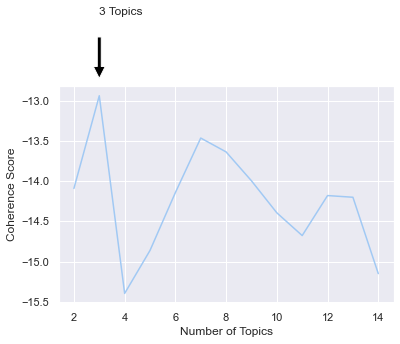

3 -12.940802874948012


In [59]:
ymax = max(coherence_list)
ymax_string = str(ymax)
xpos = coherence_list.index(ymax)
xmax = topics_range[xpos]
xmax_string = str(xmax)
plt.plot(topics_range, coherence_list)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.annotate(xmax_string + ' Topics' , xy=(xmax, ymax), xytext=(xmax, ymax+1),
            arrowprops=dict(facecolor='black', shrink=0.22),
            )
plt.show()

print(xmax, ymax)

In [60]:
# Topic parameter 
k = 3
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))

model_results = {'Alpha': [],
                 'Beta': [],
                 'Coherence': [],
                 'Perplexity': []
                }


# iterate through alpha values
for a in alpha:
    # iterare through beta values
    for b in beta:
        # get the coherence score for the given parameters
        model = btm_model(k, a, b)
            
        perplexity = model.perplexity_
        coherence = model.coherence_
            
        # Save the model results
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(Average(coherence))
        model_results['Perplexity'].append(perplexity)

100%|█████████████████████████████████████████████████████████████████████████| 23713/23713 [00:01<00:00, 13183.06it/s]


In [61]:
benchmark_df = pd.DataFrame(model_results)
print(benchmark_df)

benchmark_df.to_csv("benchmark-2.csv", index=False)

    Alpha  Beta  Coherence   Perplexity
0    0.01  0.01 -13.956598  7590.791565
1    0.01  0.31 -13.258598  4857.549571
2    0.01  0.61 -12.789783  4475.588214
3    0.01  0.91 -12.789783  4286.410948
4    0.31  0.01 -13.956598  7590.798623
5    0.31  0.31 -13.258598  4857.947796
6    0.31  0.61 -12.789783  4475.588162
7    0.31  0.91 -12.789783  4286.391234
8    0.61  0.01 -13.956598  7590.791394
9    0.61  0.31 -13.258598  4857.932527
10   0.61  0.61 -12.789783  4475.611413
11   0.61  0.91 -12.789783  4286.391183
12   0.91  0.01 -13.956598  7590.791347
13   0.91  0.31 -13.258598  4857.902852
14   0.91  0.61 -12.789783  4475.954243
15   0.91  0.91 -12.789783  4286.391133


In [62]:
# Choosen highest coherence with a trade-off for a higher perplexity because of a higher semantic correlation to make it easier to interpret
tweets_model = btm.BTM(
tweets_X, tweets_vocabulary, seed=12321, T=3, M=5, alpha=0.01, beta=0.11)
tweets_model.fit(tweets_biterms, iterations=20)
tweets_p_zd = tweets_model.transform(tweets_docs_vec)

100%|█████████████████████████████████████████████████████████████████████████| 23713/23713 [00:01<00:00, 16113.68it/s]


In [63]:
p_zd = tweets_model.transform(tweets_docs_vec)

100%|█████████████████████████████████████████████████████████████████████████| 23713/23713 [00:01<00:00, 14671.84it/s]


In [64]:
words_topics_df = tweets_model.df_words_topics_

words_topics_0 = pd.DataFrame(words_topics_df[0])
words_topics_0["word"] = words_topics_df.index

words_topics_1 = pd.DataFrame(words_topics_df[1])
words_topics_1["word"] = words_topics_df.index

words_topics_2= pd.DataFrame(words_topics_df[2])
words_topics_2["word"] = words_topics_df.index

                          0               word
ladeinfrastruktur  0.026367  ladeinfrastruktur
mit                0.017603                mit
ist                0.014236                ist
nicht              0.011197              nicht
auch               0.010994               auch
wir                0.010986                wir
auf                0.010608                auf
eine               0.010424               eine
im                 0.009956                 im
ladesäule          0.009548          ladesäule


[Text(0.5, 0, 'Topic 1 Word Probabilities'), Text(0, 0.5, 'Words')]

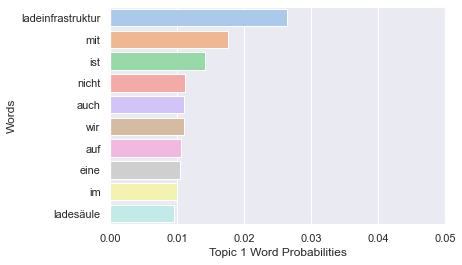

In [65]:
top_0 = words_topics_0.nlargest(10, 0)

print(top_0)
ax = sns.barplot(x=0, y="word", data=top_0)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 1 Word Probabilities', ylabel='Words')

                  1       word
ladesäule  0.024805  ladesäule
ich        0.024414        ich
ist        0.019933        ist
nicht      0.019387      nicht
mit        0.017199        mit
eine       0.014058       eine
auch       0.013502       auch
man        0.012090        man
ein        0.011842        ein
aber       0.010963       aber


[Text(0.5, 0, 'Topic 2 Word Probabilities'), Text(0, 0.5, 'Words')]

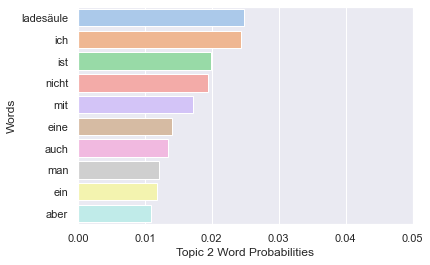

In [66]:
top_1 = words_topics_1.nlargest(10, 1)

print(top_1)
ax = sns.barplot(x=1, y="word", data=top_1)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 2 Word Probabilities', ylabel='Words')

                          2               word
ein                0.031457                ein
schneider          0.029661          schneider
electric           0.029194           electric
eine               0.028350               eine
zur                0.027399                zur
ist                0.026193                ist
ladeinfrastruktur  0.021507  ladeinfrastruktur
elektromobilität   0.018306   elektromobilität
gemeinsam          0.017765          gemeinsam
ionity             0.016983             ionity


[Text(0.5, 0, 'Topic 3 Word Probabilities'), Text(0, 0.5, 'Words')]

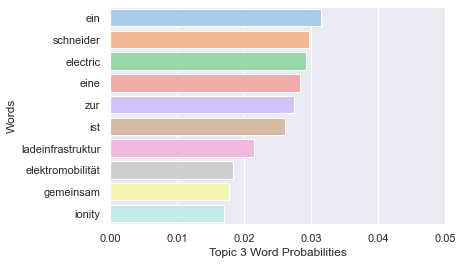

In [67]:
top_2 = words_topics_2.nlargest(10, 2)

print(top_2)
ax = sns.barplot(x=2, y="word", data=top_2)
plt.xlim(0, 0.050)
ax.set(xlabel='Topic 3 Word Probabilities', ylabel='Words')

In [68]:
top_words = btm.get_top_topic_words(
    tweets_model,
    words_num=100)


top_words_df = pd.DataFrame(top_words)
print(top_words_df.head())

top_docs = btm.get_top_topic_docs(
    tweets_df['tweet_processed'],
    p_zd,
    docs_num=3783,
    topics_idx=[0,1])

top_docs_df = pd.DataFrame(top_docs)
print(top_docs_df.head())

top_words_df.to_csv("top_words-3topics.csv", index=False)

              topic0     topic1     topic2
0  ladeinfrastruktur  ladesäule        ein
1                mit        ich  schneider
2                ist        ist   electric
3              nicht      nicht       eine
4               auch        mit        zur
                                              topic0  \
0  ladeinfrastruktur: enbw-chef bemängelt langwie...   
1  #aecom #joltenergy planen innerstädtische #hpc...   
2  förderhöchstsätze ladeinfrastruktur nrw https:...   
3  förderhöchstsätze ladeinfrastruktur nrw https:...   
4  förderhöchstsätze ladeinfrastruktur nrw https:...   

                                              topic1  
0  @unionista 👍 genau, ladesäule, 4 stunden parkd...  
1  realer irrsinn: elektroauto-ladesäule hinter b...  
2          @volkswagen #ionity logo ladesäule fehlt.  
3  nicht! geeichte tankautomaten bei #emobility. ...  
4  @p_humm apropos ladeinfrastruktur: schon geseh...  


In [69]:
tweet_topics = btm.get_docs_top_topic(tweets, tweets_model.matrix_docs_topics_)


tweet_topics.to_csv("tweets_topics-3topics.csv")

In [70]:
print(tweets_df)

       Unnamed: 0                      date             user  \
0               0 2022-04-26 08:44:26+00:00   ReinerKurzmann   
1               1 2022-04-26 08:44:03+00:00  na_presseportal   
2               2 2022-04-26 08:40:02+00:00     SmartHomeEU1   
3               3 2022-04-26 08:32:54+00:00       EPhisoloph   
4               4 2022-04-26 08:26:51+00:00           Amie42   
...           ...                       ...              ...   
23708       23708 2020-07-08 06:52:18+00:00    J_Hildermeier   
23709       23709 2020-07-08 06:40:56+00:00             BMWK   
23710       23710 2020-07-08 06:30:25+00:00     ElectriveNet   
23711       23711 2020-07-08 04:29:36+00:00         kamil2_0   
23712       23712 2020-07-08 04:23:03+00:00          MAZirke   

                                                   tweet  \
0      @kkklawitter @EggMarkus @sepp_reitberger Das e...   
1      amperio GmbH: mobileeee und amperio starten la...   
2      Zur Ladeinfrastruktur für Elektrofahrzeuge g

In [71]:
tweets_df['topic'] = tweet_topics['label'].values

In [72]:
print(tweets_df)

       Unnamed: 0                      date             user  \
0               0 2022-04-26 08:44:26+00:00   ReinerKurzmann   
1               1 2022-04-26 08:44:03+00:00  na_presseportal   
2               2 2022-04-26 08:40:02+00:00     SmartHomeEU1   
3               3 2022-04-26 08:32:54+00:00       EPhisoloph   
4               4 2022-04-26 08:26:51+00:00           Amie42   
...           ...                       ...              ...   
23708       23708 2020-07-08 06:52:18+00:00    J_Hildermeier   
23709       23709 2020-07-08 06:40:56+00:00             BMWK   
23710       23710 2020-07-08 06:30:25+00:00     ElectriveNet   
23711       23711 2020-07-08 04:29:36+00:00         kamil2_0   
23712       23712 2020-07-08 04:23:03+00:00          MAZirke   

                                                   tweet  \
0      @kkklawitter @EggMarkus @sepp_reitberger Das e...   
1      amperio GmbH: mobileeee und amperio starten la...   
2      Zur Ladeinfrastruktur für Elektrofahrzeuge g

In [73]:
# calculate Tweet sentiment

analyzer = SentimentIntensityAnalyzer()
def calculate_sentiment(dataframe):
    utf_encoded = dataframe["tweet"].encode('utf-16', 'surrogatepass').decode('utf-16')
    vs = analyzer.polarity_scores(utf_encoded)
    neg_list.append(vs["neg"])
    neu_list.append(vs["neu"])
    pos_list.append(vs["pos"])
    com_list.append(vs["compound"])
    return dataframe

In [74]:
neg_list = []
neu_list = []
pos_list = []
com_list = []
tweets_df = tweets_df.apply(lambda x: calculate_sentiment(x), axis=1)

In [75]:
tweets_df["negative"] = neg_list
tweets_df["neutral"] = neu_list
tweets_df["positive"] = pos_list
tweets_df["compound"] = com_list
print(tweets_df)

       Unnamed: 0                      date             user  \
0               0 2022-04-26 08:44:26+00:00   ReinerKurzmann   
1               1 2022-04-26 08:44:03+00:00  na_presseportal   
2               2 2022-04-26 08:40:02+00:00     SmartHomeEU1   
3               3 2022-04-26 08:32:54+00:00       EPhisoloph   
4               4 2022-04-26 08:26:51+00:00           Amie42   
...           ...                       ...              ...   
23708       23708 2020-07-08 06:52:18+00:00    J_Hildermeier   
23709       23709 2020-07-08 06:40:56+00:00             BMWK   
23710       23710 2020-07-08 06:30:25+00:00     ElectriveNet   
23711       23711 2020-07-08 04:29:36+00:00         kamil2_0   
23712       23712 2020-07-08 04:23:03+00:00          MAZirke   

                                                   tweet  \
0      @kkklawitter @EggMarkus @sepp_reitberger Das e...   
1      amperio GmbH: mobileeee und amperio starten la...   
2      Zur Ladeinfrastruktur für Elektrofahrzeuge g

In [76]:
def assign_sentiment(row):
    float_compound = float(row['compound'])
    if float_compound >= 0.05:
        val = 'Positive'
    elif float_compound <= -0.05:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val

In [77]:
tweets_df['sentiment'] = tweets_df.apply(assign_sentiment, axis=1)

In [78]:
topic_0_df = tweets_df[(tweets_df["topic"] == 0)]
topic_1_df = tweets_df[(tweets_df["topic"] == 1)]
topic_2_df = tweets_df[(tweets_df["topic"] == 2)]

In [79]:
print(topic_0_df)

       Unnamed: 0                      date             user  \
5               5 2022-04-26 08:26:31+00:00  verkehrswendeb2   
14             14 2022-04-26 07:08:25+00:00   abbdeutschland   
15             15 2022-04-26 07:00:01+00:00      energie_rlp   
16             16 2022-04-26 06:48:23+00:00     ReegerLothar   
19             19 2022-04-26 06:22:01+00:00       manuel01St   
...           ...                       ...              ...   
23703       23703 2020-07-08 07:32:02+00:00             BMWK   
23704       23704 2020-07-08 07:30:56+00:00             BMWK   
23706       23706 2020-07-08 07:13:48+00:00  thomas1nitschke   
23708       23708 2020-07-08 06:52:18+00:00    J_Hildermeier   
23710       23710 2020-07-08 06:30:25+00:00     ElectriveNet   

                                                   tweet  \
5      @kkklawitter @grnFlip @DerGraslutscher @Baeuml...   
14     Nächster Halt: #Berlin. Besuchen Sie uns dort ...   
15     🚗🔌🔋 Wie hat sich die #Ladeinfrastruktur in #

In [80]:
topic_0_df.to_csv("topic_0-with_sentiment.csv")
topic_1_df.to_csv("topic_1-with_sentiment.csv")
topic_2_df.to_csv("topic_2-with_sentiment.csv")

In [81]:
topic_0_sentiment = topic_0_df.groupby(['sentiment']).size()
topic_1_sentiment = topic_1_df.groupby(['sentiment']).size()
topic_2_sentiment = topic_2_df.groupby(['sentiment']).size()


positive_0 = topic_0_sentiment['Positive']
neutral_0 = topic_0_sentiment['Neutral']
negative_0 = topic_0_sentiment['Negative']
positive_1 = topic_1_sentiment['Positive']
neutral_1 = topic_1_sentiment['Neutral']
negative_1 = topic_1_sentiment['Negative']
positive_2 = topic_2_sentiment['Positive']
neutral_2 = topic_2_sentiment['Neutral']
negative_2 = topic_2_sentiment['Negative']

labels = ['Positive', 'Neutral', 'Negative' ]
sentiment_count_0 = [positive_0, neutral_0, negative_0]
sentiment_count_1 = [positive_1, neutral_1, negative_1]
sentiment_count_2 = [positive_2, neutral_2, negative_2]

In [82]:
topic_0_sum = sum(sentiment_count_0)
print(sentiment_count_0[0]/topic_0_sum)
print(sentiment_count_0[1]/topic_0_sum)
print(sentiment_count_0[2]/topic_0_sum)

topic_1_sum = sum(sentiment_count_1)
print(sentiment_count_1[0]/topic_1_sum)
print(sentiment_count_1[1]/topic_1_sum)
print(sentiment_count_1[2]/topic_1_sum)

topic_2_sum = sum(sentiment_count_2)
print(sentiment_count_2[0]/topic_2_sum)
print(sentiment_count_2[1]/topic_2_sum)
print(sentiment_count_2[2]/topic_2_sum)

0.040824871768030985
0.48016329948707215
0.4790118287448969
0.06374103120307024
0.37685633238778576
0.559402636409144
0.03771849126034959
0.7511499540018399
0.21113155473781048


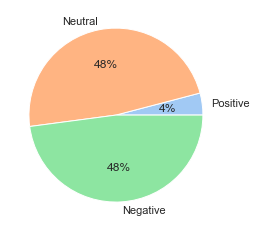

In [83]:
plt.pie(sentiment_count_0, labels = labels, autopct='%.0f%%')
plt.show()

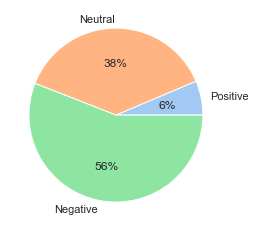

In [84]:
plt.pie(sentiment_count_1, labels = labels, autopct='%.0f%%')
plt.show()

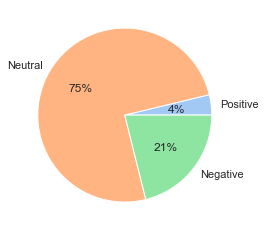

In [85]:
plt.pie(sentiment_count_2, labels = labels, autopct='%.0f%%')
plt.show()

In [86]:
topic_0_negative_df = topic_0_df[(topic_0_df["sentiment"] == "Negative")]
topic_1_negative_df = topic_1_df[(topic_1_df["sentiment"] == "Negative")]
topic_2_negative_df = topic_2_df[(topic_2_df["sentiment"] == "Negative")]

In [87]:
positive_0_percentage = (positive_0 / topic_0_sum) * 100
neutral_0_percentage = (neutral_0 / topic_0_sum) * 100
negative_0_percentage = (negative_0 / topic_0_sum) * 100

positive_1_percentage = (positive_1 / topic_1_sum) * 100
neutral_1_percentage = (neutral_1 / topic_1_sum) * 100
negative_1_percentage = (negative_1 / topic_1_sum) * 100

positive_2_percentage = (positive_2 / topic_2_sum) * 100
neutral_2_percentage = (neutral_2 / topic_2_sum) * 100
negative_2_percentage = (negative_2 / topic_2_sum) * 100

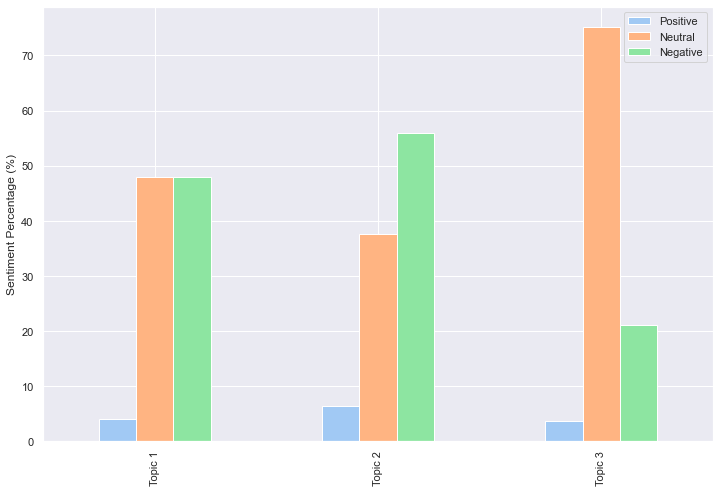

In [88]:
data=[["Topic 1",positive_0_percentage,neutral_0_percentage,negative_0_percentage],
      ["Topic 2",positive_1_percentage,neutral_1_percentage,negative_1_percentage],
      ["Topic 3",positive_2_percentage,neutral_2_percentage,negative_2_percentage]]
df=pd.DataFrame(data,columns=["Topic","Positive","Neutral","Negative"])
df.plot(ylabel = "Count", x="Topic", y=["Positive", "Neutral", "Negative"], kind="bar",figsize=(12,8))
plt.xlabel('')
plt.ylabel('Sentiment Percentage (%)') 
plt.show()

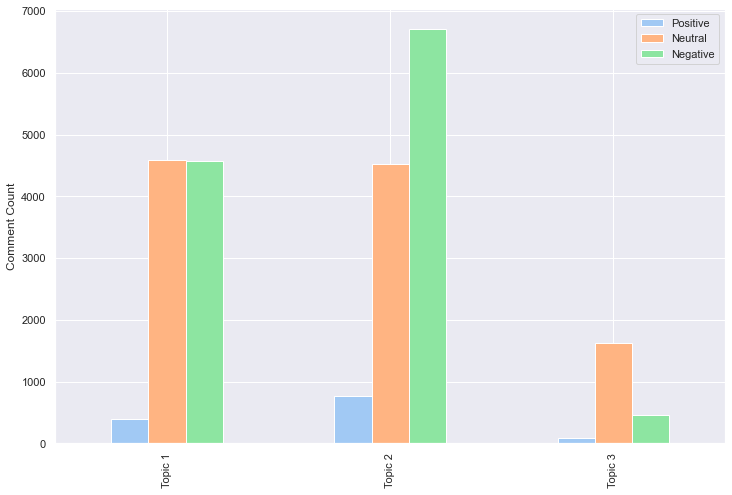

In [89]:
data=[["Topic 1",positive_0,neutral_0,negative_0],
      ["Topic 2",positive_1,neutral_1,negative_1],
      ["Topic 3",positive_2,neutral_2,negative_2]]
df=pd.DataFrame(data,columns=["Topic","Positive","Neutral","Negative"])
df.plot(ylabel = "Count", x="Topic", y=["Positive", "Neutral", "Negative"], kind="bar",figsize=(12,8))
plt.xlabel('')
plt.ylabel('Comment Count') 
plt.show()

In [90]:
print(topic_0_negative_df)
print(topic_1_negative_df)
print(topic_2_negative_df)

topic_0_negative_df.to_csv("negative_topic_0.csv")
topic_1_negative_df.to_csv("negative_topic_1.csv")
topic_2_negative_df.to_csv("negative_topic_2.csv")

       Unnamed: 0                      date             user  \
15             15 2022-04-26 07:00:01+00:00      energie_rlp   
16             16 2022-04-26 06:48:23+00:00     ReegerLothar   
31             31 2022-04-25 22:40:52+00:00         Acostard   
32             32 2022-04-25 22:28:54+00:00     martin_kraft   
33             33 2022-04-25 21:21:10+00:00        SaschaPPP   
...           ...                       ...              ...   
23686       23686 2020-07-08 11:05:03+00:00  zeitung_energie   
23689       23689 2020-07-08 10:19:55+00:00      energie_rlp   
23693       23693 2020-07-08 09:37:32+00:00            theho   
23706       23706 2020-07-08 07:13:48+00:00  thomas1nitschke   
23710       23710 2020-07-08 06:30:25+00:00     ElectriveNet   

                                                   tweet  \
15     🚗🔌🔋 Wie hat sich die #Ladeinfrastruktur in #RL...   
16     Mit dieser Batterie hat er eine technischen Vo...   
31     @footils @radiermann Die Niederländer bauen 

In [91]:
work_dir = "C:/Users/fabia/OneDrive - Otto-Friedrich-Universität Bamberg/Master/Masterarbeit/Data/Twitter/"

In [92]:
negative_topic_0 = pd.read_csv(work_dir + "negative_topic_0.csv")
negative_topic_1 = pd.read_csv(work_dir + "negative_topic_1.csv")
negative_topic_2 = pd.read_csv(work_dir + "negative_topic_2.csv")

In [93]:
print(negative_topic_1.head())

   Unnamed: 0.1  Unnamed: 0                       date            user  \
0             0           0  2022-04-26 08:44:26+00:00  ReinerKurzmann   
1             4           4  2022-04-26 08:26:51+00:00          Amie42   
2             6           6  2022-04-26 08:24:55+00:00   PTNisWarCrmnl   
3             7           7  2022-04-26 08:00:07+00:00   rouTfuAeiropA   
4            18          18  2022-04-26 06:22:57+00:00     skippertom3   

                                               tweet  \
0  @kkklawitter @EggMarkus @sepp_reitberger Das e...   
1  @Mingiam10 @kkklawitter Mein Punkt ist ja der ...   
2  @kkklawitter @Mingiam10 @DerGraslutscher Noch ...   
3  @kkklawitter Für die Ladeinfrastruktur braucht...   
4  @Luisamneubauer Ach ja: Und wenn mir jetzt noc...   

                                                 url  \
0  https://twitter.com/ReinerKurzmann/status/1518...   
1  https://twitter.com/Amie42/status/151886919943...   
2  https://twitter.com/PTNisWarCrmnl/status/15188.

In [94]:
print(negative_topic_0["compound"].mean())
print(negative_topic_1["compound"].mean())
print(negative_topic_2["compound"].mean())

print(negative_topic_0["compound"].median())
print(negative_topic_0["compound"].median())
print(negative_topic_0["compound"].median())

print(negative_topic_0["compound"].mode())
print(negative_topic_0["compound"].mode())
print(negative_topic_0["compound"].mode())

-0.6808002840909159
-0.6790062341536311
-0.6635241830065374
-0.5994
-0.5994
-0.5994
0   -0.5994
Name: compound, dtype: float64
0   -0.5994
Name: compound, dtype: float64
0   -0.5994
Name: compound, dtype: float64


In [95]:
compound_df = pd.DataFrame() 
compound_df["Topic 0 - Compound"] = negative_topic_0["compound"]
compound_df["Topic 1 - Compound"] = negative_topic_1["compound"]
compound_df["Topic 2 - Compound"] = negative_topic_2["compound"]

print(compound_df)

      Topic 0 - Compound  Topic 1 - Compound  Topic 2 - Compound
0                -0.8316             -0.8316             -0.8316
1                -0.8316             -0.8316             -0.5994
2                -0.5994             -0.7987             -0.4019
3                -0.5994             -0.7783             -0.5994
4                -0.7650             -0.5994             -0.5994
...                  ...                 ...                 ...
4571             -0.8316             -0.5994                 NaN
4572             -0.5994             -0.5994                 NaN
4573             -0.8316             -0.4019                 NaN
4574             -0.8316             -0.8316                 NaN
4575             -0.5994             -0.9136                 NaN

[4576 rows x 3 columns]


<AxesSubplot:>

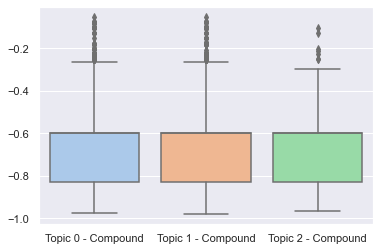

In [13]:
sns.boxplot(data=compound_df)

In [90]:
topic_0_with_sentiment = pd.read_csv(work_dir + "/topic_0-with_sentiment.csv")
topic_1_with_sentiment = pd.read_csv(work_dir + "/topic_1-with_sentiment.csv")
topic_2_with_sentiment = pd.read_csv(work_dir + "/topic_2-with_sentiment.csv")

In [91]:
compound_df = pd.DataFrame() 
compound_df["Topic 0 - Compound"] = topic_0_with_sentiment["compound"]
compound_df["Topic 1 - Compound"] = topic_1_with_sentiment["compound"]
compound_df["Topic 2 - Compound"] = topic_2_with_sentiment["compound"]

print(compound_df)

      Topic 0 - Compound  Topic 1 - Compound  Topic 2 - Compound
0                 0.0000             -0.8316              0.0000
1                 0.0000              0.0000              0.0000
2                -0.8316             -0.8316              0.0000
3                -0.8316             -0.7987              0.0000
4                 0.4588             -0.7783             -0.8316
...                  ...                 ...                 ...
9548              0.0000              0.0000                 NaN
9549              0.0000              0.2263                 NaN
9550             -0.8316              0.0000                 NaN
9551              0.0000              0.0000                 NaN
9552             -0.5994             -0.5994                 NaN

[9553 rows x 3 columns]


<AxesSubplot:>

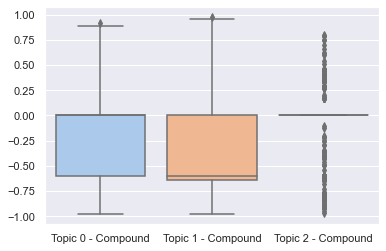

In [92]:
sns.boxplot(data=compound_df)

In [13]:
#topic_0_df = topic_0_df[(topic_0_df['date'] > "2020-07-08")]
print(topic_0_with_sentiment.shape)
#topic_0_df['date'] = pd.to_datetime(topic_0_df['date'])

#sns.lineplot(data=topic_0_with_sentiment, x="date", y="compound")

(9553, 13)


<AxesSubplot:xlabel='date', ylabel='compound'>

Error in callback <function flush_figures at 0x00000207D3906A60> (for post_execute):



KeyboardInterrupt



In [93]:
print(topic_0_with_sentiment.shape)
print(topic_1_with_sentiment.shape)
print(topic_2_with_sentiment.shape)

(9553, 13)
(11986, 13)
(2174, 13)


In [94]:
print(topic_0_with_sentiment.head())

   Unnamed: 0.1  Unnamed: 0                       date             user  \
0             5           5  2022-04-26 08:26:31+00:00  verkehrswendeb2   
1            14          14  2022-04-26 07:08:25+00:00   abbdeutschland   
2            15          15  2022-04-26 07:00:01+00:00      energie_rlp   
3            16          16  2022-04-26 06:48:23+00:00     ReegerLothar   
4            19          19  2022-04-26 06:22:01+00:00       manuel01St   

                                               tweet  \
0  @kkklawitter @grnFlip @DerGraslutscher @Baeuml...   
1  Nächster Halt: #Berlin. Besuchen Sie uns dort ...   
2  🚗🔌🔋 Wie hat sich die #Ladeinfrastruktur in #RL...   
3  Mit dieser Batterie hat er eine technischen Vo...   
4  Beispiel für clever installierte Ladeinfrastru...   

                                                 url  \
0  https://twitter.com/verkehrswendeb2/status/151...   
1  https://twitter.com/abbdeutschland/status/1518...   
2  https://twitter.com/energie_rlp/status/15

In [95]:
def get_hashtags(dataframe):
    tweet = dataframe['tweet']
    hashtag = [i[1:] for i in tweet.split() if i.startswith("#")]
    hashtags.append(hashtag)
    
hashtags = []
topic_0_with_sentiment.apply(lambda x: get_hashtags(x), axis=1)
topic_0_hashtags = hashtags

hashtags = []
topic_1_with_sentiment.apply(lambda x: get_hashtags(x), axis=1)
topic_1_hashtags = hashtags

hashtags = []
topic_2_with_sentiment.apply(lambda x: get_hashtags(x), axis=1)
topic_2_hashtags = hashtags

In [96]:
hashtags_0_flat = [item for sublist in topic_0_hashtags for item in sublist]
print(len(hashtags_0_flat))

hashtags_1_flat = [item for sublist in topic_1_hashtags for item in sublist]
print(len(hashtags_1_flat))

hashtags_2_flat = [item for sublist in topic_2_hashtags for item in sublist]
print(len(hashtags_2_flat))

15490
6108
3046


In [97]:
hashtag_0_occurences = {i:hashtags_0_flat.count(i) for i in hashtags_0_flat}
hashtag_1_occurences = {i:hashtags_1_flat.count(i) for i in hashtags_1_flat}
hashtag_2_occurences = {i:hashtags_2_flat.count(i) for i in hashtags_2_flat}

In [98]:
hashtag_0_df = pd.DataFrame(list(hashtag_0_occurences.items()), columns = ['Hashtag','Count'])
hashtag_1_df = pd.DataFrame(list(hashtag_1_occurences.items()), columns = ['Hashtag','Count'])
hashtag_2_df = pd.DataFrame(list(hashtag_2_occurences.items()), columns = ['Hashtag','Count'])

In [99]:
sorted_0__df = hashtag_0_df.sort_values(by=['Count'], ascending=False)
sorted_1__df = hashtag_1_df.sort_values(by=['Count'], ascending=False)
sorted_2__df = hashtag_2_df.sort_values(by=['Count'], ascending=False)

sorted_0__df.to_csv("topic_0-hashtag_occurence.csv", index = False)
sorted_1__df.to_csv("topic_1-hashtag_occurence.csv", index = False)
sorted_2__df.to_csv("topic_2-hashtag_occurence.csv", index = False)

In [105]:
def get_mentions(dataframe):
    tweet = dataframe['tweet']
    mention = [i[1:] for i in tweet.split() if i.startswith("@")]
    mentions.append(mention)

mentions = []
topic_0_with_sentiment.apply(lambda x: get_mentions(x), axis=1)
topic_0_mentions = mentions
mentions = []
topic_1_with_sentiment.apply(lambda x: get_mentions(x), axis=1)
topic_1_mentions = mentions
mentions = []
topic_2_with_sentiment.apply(lambda x: get_mentions(x), axis=1)
topic_2_mentions = mentions

In [106]:
mentions_0_flat = [item for sublist in topic_0_mentions for item in sublist]
mentions_1_flat = [item for sublist in topic_1_mentions for item in sublist]
mentions_2_flat = [item for sublist in topic_2_mentions for item in sublist]

In [108]:
print(mentions_1_flat)

['kkklawitter', 'EggMarkus', 'sepp_reitberger', 'chris_pyak', 'JRehborn', 'HerrPhteven', 'Mingiam10', 'kkklawitter', 'kkklawitter', 'Mingiam10', 'DerGraslutscher', 'kkklawitter', 'DerDienstreiser', 'die20er_innen', 'kkklawitter', 'verkehrswendeb2', 'kkklawitter', 'Raini68', 'kkklawitter', 'DerGraslutscher', 'kkklawitter', 'derneunte', 'kkklawitter', 'Luisamneubauer', 'mikenolte_de', 'kkklawitter', 'kkklawitter', 'Doktorino82', 'joschtl', 'kkklawitter', 'kkklawitter', 'joanadiskurs', 'Mitzi62042431', 'krauthofen', 'UliMolter', 'atlanticandme', 'kkklawitter', 'haiikun', 'DavidCh56889323', 'Kricke1905', 'DavidCh56889323', 'Kricke1905', 'TeslaClubAT', 'OEAMTC', 'KralMarcella', 'bmarwell', 'Schupunkt', 'kkklawitter', 'bmwk', 'nikitheblogger', 'ropietsch', 'YEAccount1', 'radiermann', 'djsmokey_z', 'Sternen__Himmel', 'Essen_Ruhr', 'DerDienstreiser', 'die20er_innen', 'kkklawitter', 'KI_in_med', 'joschtl', 'kkklawitter', 'qualityofdeath', 'kkklawitter', 'LyllithB', 'kkklawitter', 'MoritzSchwaa'

In [109]:
mention_0_occurences = {i:mentions_0_flat.count(i) for i in mentions_0_flat}
mention_1_occurences = {i:mentions_1_flat.count(i) for i in mentions_1_flat}
mention_2_occurences = {i:mentions_2_flat.count(i) for i in mentions_2_flat}

In [110]:
mentions_0_df = pd.DataFrame(list(mention_0_occurences.items()), columns = ['Mention','Count'])
mentions_1_df = pd.DataFrame(list(mention_1_occurences.items()), columns = ['Mention','Count'])
mentions_2_df = pd.DataFrame(list(mention_2_occurences.items()), columns = ['Mention','Count'])

In [111]:
sorted_0_df = mentions_0_df.sort_values(by=['Count'], ascending=False)
sorted_1_df = mentions_1_df.sort_values(by=['Count'], ascending=False)
sorted_2_df = mentions_2_df.sort_values(by=['Count'], ascending=False)

sorted_0_df.to_csv("topic_0-mention_occurence.csv")
sorted_1_df.to_csv("topic_1-mention_occurence.csv")
sorted_2_df.to_csv("topic_2-mention_occurence.csv")

In [114]:
df_0_10 = sorted_0_df.loc[sorted_0_df['Count'] >= 10]
df_1_10 = sorted_1_df.loc[sorted_1_df['Count'] >= 10]
df_2_10 = sorted_2_df.loc[sorted_2_df['Count'] >= 10]

In [118]:
print(len(df_0_10))
df_0_user = []
for index, row in df_0_10.iterrows():
    print(row['Mention'], row['Count'])
    user_type = input("Enter user type: ")
    df_0_user.append(user_type)

122
BMVI 148
Enter user type: Federal Ministry of Transport and Digital Infrastructure
kkklawitter 118
Enter user type: Book author
Elektro_Robin 100
Enter user type: Influencer
VDA_online 88
Enter user type: German Association of the Automotive Industry (VDA)
news_nowgmbh 88
Enter user type: Company
EnBW 86
Enter user type: Energy provider
Stefan_Hajek 67
Enter user type: Author
nextmove_de 62
Enter user type: YouTube
VQuaschning 51
Enter user type: Scientist 
Tesla 50
Enter user type: Company
bdew_ev 45
Enter user type: Energy lobby
Die_Gruenen 44
Enter user type: Political party
Hagen 44
Enter user type: Influencer
stang2k 44
Enter user type: Influencer
AndiScheuer 43
Enter user type: Politician
welt 41
Enter user type: News
peteraltmaier 40
Enter user type: Politician
faznet 39
Enter user type: News
andreasscheuer 34
Enter user type: Politician
cem_oezdemir 34
Enter user type: Politician
CKemfert 33
Enter user type: Scientist
BMWi_Bund 33
Enter user type: Federal Ministry of Econom

In [119]:
print(df_0_user)

['Federal Ministry of Transport and Digital Infrastructure', 'Book author', 'Influencer', 'German Association of the Automotive Industry (VDA)', 'Company', 'Energy provider', 'Author', 'YouTube', 'Scientist ', 'Company', 'Energy lobby', 'Political party', 'Influencer', 'Influencer', 'Politician', 'News', 'Politician', 'News', 'Politician', 'Politician', 'Scientist', 'Federal Ministry of Economics and Technology', 'Influencer', 'Politician', 'Politician', 'E-News', 'News', 'Influencer', 'News', 'Federal Ministry of Transport and Digital Infrastructure', 'News', 'Infrastructure provider', 'Scientist', 'Businessman', 'The Federal Ministry for the Environment, Nature Conservation, Nuclear Safety and Consumer Protection', 'Political party', 'Businessman', 'Charging infrastructure provider', 'Politician', 'Influencer', 'YouTube', 'Government funding', 'Charging infrastructure provider', 'Company', 'Charging infrastructure provider', 'Politician', 'E-News', 'News', 'Influencer', 'E-News', 'Po

In [120]:
df_0_10['user_type'] = df_0_user

print(df_0_10)

            Mention  Count                                          user_type
1181           BMVI    148  Federal Ministry of Transport and Digital Infr...
0       kkklawitter    118                                        Book author
35    Elektro_Robin    100                                         Influencer
117      VDA_online     88  German Association of the Automotive Industry ...
71     news_nowgmbh     88                                            Company
...             ...    ...                                                ...
2284  volkswagen_de     10                                            Company
424    M_Hundhausen     10                                          Scientist
3668        _Cap_22     10                                                  -
855       VKUonline     10                                              Lobby
1105        NetzeBW     10                                    Energy provider

[122 rows x 3 columns]


C:\Users\fabia\AppData\Local\Temp\ipykernel_4864\1919425395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_10['user_type'] = df_0_user


In [131]:
df_0_10.to_csv('topic_0-with_user_type.csv', index=False)

In [126]:
df_1_user = []
for index, row in df_1_10.iterrows():
    print(row['Mention'], row['Count'])
    user_type = input("Enter user type: ")
    df_1_user.append(user_type)

Elektro_Robin 318
Enter user type: Influencer
kkklawitter 290
Enter user type: Author
EnBW 225
Enter user type: Charging infrastructure provider
nextmove_de 206
Enter user type: Charging infrastructure provider
thestanceman1 157
Enter user type: Influencer
Stefan_Hajek 146
Enter user type: Author
Hagen 143
Enter user type: E-News
stang2k 140
Enter user type: Influencer
VQuaschning 127
Enter user type: Scientist
tagesschau 122
Enter user type: News
janusPrime 115
Enter user type: Influencer
Mingiam10 99
Enter user type: Influencer
frankfeil 95
Enter user type: Businessman
CMDRArchadder 91
Enter user type: -
Tesla 90
Enter user type: Company
ABaerbock 78
Enter user type: Politician
FabianLaasch 77
Enter user type: Businessman
Karl_Lauterbach 76
Enter user type: Politician
_Cap_22 69
Enter user type: -
welt 67
Enter user type: News
volkswagen 67
Enter user type: Company
HerrPhteven 67
Enter user type: Influencer
technikjuli 63
Enter user type: Influencer
Die_Gruenen 63
Enter user type: Po

Enter user type: Influencer
DOeliger 14
Enter user type: Influencer
stekkerauto 14
Enter user type: Influencer
Sedios1 14
Enter user type: Influencer
DerWirkungsgrad 14
Enter user type: Influencer
bmu 14
Enter user type: The Federal Ministry for the Environment, Nature Conservation, Nuclear Safety and Consumer Protection
DerNicoA 13
Enter user type: Influencer
Nuklearia 13
Enter user type: Influencer
SWM_Muenchen 13
Enter user type: Charging infrastructure provider
bdew_ev 13
Enter user type: Energy lobby
Umwelthilfe 13
Enter user type: Social initiative
Shell_Germany 13
Enter user type: Charging infrastructure provider
Alexand23573402 13
Enter user type: Influencer
ThorstenRinne 13
Enter user type: Influencer
HShumanist 13
Enter user type: Politician
Schwunkvoll 13
Enter user type: YouTube
CleanElectrCast 13
Enter user type: Influencer
timohetzel 13
Enter user type: Influencer
WienEnergie 13
Enter user type: Charging infrastructure provider
PeugeotDE 13
Enter user type: Company 
Herrm

In [127]:
print(df_1_user)

['Influencer', 'Author', 'Charging infrastructure provider', 'Charging infrastructure provider', 'Influencer', 'Author', 'E-News', 'Influencer', 'Scientist', 'News', 'Influencer', 'Influencer', 'Businessman', '-', 'Company', 'Politician', 'Businessman', 'Politician', '-', 'News', 'Company', 'Influencer', 'Influencer', 'Political party', 'News', 'YouTube', 'Politician', 'Scientist', 'Charging infrastructure provider', 'German Association of the Automotive Industry (VDA)', 'Influencer', 'Political party', 'Businessman', 'Influencer', 'Politician', 'Politician', 'Politician', 'News', 'Businessman', 'Influencer', 'Company', 'Politician', 'Businessman', 'Charging infrastructure provider', 'Politician', 'Federal Ministry of Economics and Technology', 'Influencer', 'Politician', '-', 'News', 'Influencer', 'Influencer', 'E-Journalist', 'Influencer', 'Automotive club', 'Politician', 'Influencer', 'Influencer', 'Businessman', 'Politician', 'Influencer', 'Scientist', 'Scientist', 'Politician', 'N

In [135]:
df_1_10['user_type'] = df_1_user

print(df_1_10)

             Mention  Count                         user_type
420    Elektro_Robin    318                        Influencer
0        kkklawitter    290                            Author
44              EnBW    225  Charging infrastructure provider
374      nextmove_de    206  Charging infrastructure provider
578    thestanceman1    157                        Influencer
...              ...    ...                               ...
646       radkolumne     10                 Social initiative
1932  alwayssimifuzi     10                        Influencer
2350            vzbv     10                   Consumer center
1579        wegeheld     10                        Influencer
4172   ChristianOnRE     10                         Scientist

[314 rows x 3 columns]


C:\Users\fabia\AppData\Local\Temp\ipykernel_4864\1991351792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_10['user_type'] = df_1_user


In [136]:
df_1_10.to_csv('topic_1-with_user_type.csv', index=False)

In [137]:
df_2_user = []
for index, row in df_2_10.iterrows():
    print(row['Mention'], row['Count'])
    user_type = input("Enter user type: ")
    df_2_user.append(user_type)

BMVI 16
Enter user type: Federal Ministry of Transport and Digital Infrastructure
glsbank 14
Enter user type: Company
peteraltmaier 13
Enter user type: Politician


In [163]:
topic_0_negative_sentiment = topic_0_with_sentiment.loc[topic_0_with_sentiment['sentiment'] == 'Negative']
topic_1_negative_sentiment = topic_1_with_sentiment.loc[topic_1_with_sentiment['sentiment'] == 'Negative']
topic_2_negative_sentiment = topic_2_with_sentiment.loc[topic_2_with_sentiment['sentiment'] == 'Negative']

In [164]:
hashtags = []
topic_0_negative_sentiment.apply(lambda x: get_hashtags(x), axis=1)
topic_0_negative_hashtags = hashtags
hashtags = []
topic_1_negative_sentiment.apply(lambda x: get_hashtags(x), axis=1)
topic_1_negative_hashtags = hashtags
hashtags = []
topic_2_negative_sentiment.apply(lambda x: get_hashtags(x), axis=1)
topic_2_negative_hashtags = hashtags

In [166]:
hashtags_0_negative_flat = [item for sublist in topic_0_negative_hashtags for item in sublist]
print(len(hashtags_0_negative_flat))
hashtags_1_negative_flat = [item for sublist in topic_1_negative_hashtags for item in sublist]
print(len(hashtags_1_negative_flat))
hashtags_2_negative_flat = [item for sublist in topic_2_negative_hashtags for item in sublist]
print(len(hashtags_2_negative_flat))

6604
2682
683


In [167]:
hashtag_0_negative_occurences = {i:hashtags_0_negative_flat.count(i) for i in hashtags_0_negative_flat}
hashtag_1_negative_occurences = {i:hashtags_1_negative_flat.count(i) for i in hashtags_1_negative_flat}
hashtag_2_negative_occurences = {i:hashtags_2_negative_flat.count(i) for i in hashtags_2_negative_flat}

In [168]:
hashtag_0_negative_df = pd.DataFrame(list(hashtag_0_negative_occurences.items()), columns = ['Hashtag','Count'])
hashtag_1_negative_df = pd.DataFrame(list(hashtag_1_negative_occurences.items()), columns = ['Hashtag','Count'])
hashtag_2_negative_df = pd.DataFrame(list(hashtag_2_negative_occurences.items()), columns = ['Hashtag','Count'])

In [169]:
sorted_0_negative_df = hashtag_0_negative_df.sort_values(by=['Count'], ascending=False)
sorted_1_negative_df = hashtag_1_negative_df.sort_values(by=['Count'], ascending=False)
sorted_2_negative_df = hashtag_2_negative_df.sort_values(by=['Count'], ascending=False)

sorted_0_negative_df.to_csv("topic_0_negative-hashtag_occurence.csv", index = False)
sorted_1_negative_df.to_csv("topic_1_negative-hashtag_occurence.csv", index = False)
sorted_2_negative_df.to_csv("topic_2_negative-hashtag_occurence.csv", index = False)

In [171]:
mentions = []
topic_0_negative_sentiment.apply(lambda x: get_mentions(x), axis=1)
topic_0_negative_mentions = mentions
mentions = []
topic_1_negative_sentiment.apply(lambda x: get_mentions(x), axis=1)
topic_1_negative_mentions = mentions
mentions = []
topic_2_negative_sentiment.apply(lambda x: get_mentions(x), axis=1)
topic_2_negative_mentions = mentions

In [172]:
mentions_0_negative_flat = [item for sublist in topic_0_negative_mentions for item in sublist]
mentions_1_negative_flat = [item for sublist in topic_1_negative_mentions for item in sublist]
mentions_2_negative_flat = [item for sublist in topic_2_negative_mentions for item in sublist]

In [173]:
mention_0_negative_occurences = {i:mentions_0_negative_flat.count(i) for i in mentions_0_negative_flat}
mention_1_negative_occurences = {i:mentions_1_negative_flat.count(i) for i in mentions_1_negative_flat}
mention_2_negative_occurences = {i:mentions_2_negative_flat.count(i) for i in mentions_2_negative_flat}

In [174]:
mentions_0_negative_df = pd.DataFrame(list(mention_0_negative_occurences.items()), columns = ['Mention','Count'])
mentions_1_negative_df = pd.DataFrame(list(mention_1_negative_occurences.items()), columns = ['Mention','Count'])
mentions_2_negative_df = pd.DataFrame(list(mention_2_negative_occurences.items()), columns = ['Mention','Count'])

In [176]:
print(mentions_0_negative_df)

                Mention  Count
0               footils      1
1            radiermann      4
2                ohoerl      3
3           kkklawitter     77
4        Henrik30595432      1
...                 ...    ...
2859  Bundeskartellamts      1
2860            hachtl1      1
2861    thorstenbruns70      1
2862        monnemfirst      1
2863       MangaVenaqui      1

[2864 rows x 2 columns]


In [178]:
sorted_0_negative_df = mentions_0_negative_df.sort_values(by=['Count'], ascending=False)
sorted_1_negative_df = mentions_1_negative_df.sort_values(by=['Count'], ascending=False)
sorted_2_negative_df = mentions_2_negative_df.sort_values(by=['Count'], ascending=False)

sorted_0_negative_df.to_csv("topic_0_negative-mention_occurence.csv", index = False)
sorted_1_negative_df.to_csv("topic_1_negative-mention_occurence.csv", index = False)
sorted_2_negative_df.to_csv("topic_2_negative-mention_occurence.csv", index = False)

In [180]:
print(sorted_1_negative_df)
print(sorted_1_df)

            Mention  Count
0       kkklawitter    186
262   Elektro_Robin    184
401            EnBW    138
230     nextmove_de    126
366   thestanceman1     89
...             ...    ...
2785  Leaving_Orbit      1
838          DrBimi      1
2787           rrho      1
837         uds2019      1
5369      Poveretto      1

[5370 rows x 2 columns]
              Mention  Count
420     Elektro_Robin    318
0         kkklawitter    290
44               EnBW    225
374       nextmove_de    206
578     thestanceman1    157
...               ...    ...
3419  peter1974bayern      1
3418       Taru_Tuomi      1
3413     PapkeGerhard      1
3412  AusDerUckermark      1
7661        Poveretto      1

[7662 rows x 2 columns]


In [144]:
follower = pd.read_csv(work_dir + "/users_with_followers.csv")
merged_user = pd.read_csv(work_dir + "/merged_user.csv")

In [156]:
print(follower.shape)
follower_wo_duplicates = follower.drop_duplicates(subset=['username'])
print(follower_wo_duplicates.shape)

(3766194, 4)
(6319, 4)


In [157]:
inner_join = pd.merge(follower_wo_duplicates, merged_user, left_on = 'username', right_on = 'user_name', how='inner')


In [158]:
na_sum = inner_join['username'].isna().sum()
print(na_sum)

27


In [159]:
# Follower collection might have failed for some reason
print(inner_join)

      follower_id follower_username         username     user_id_x  \
0             NaN               NaN              NaN           NaN   
1             NaN               NaN              NaN           NaN   
2             NaN               NaN              NaN           NaN   
3             NaN               NaN              NaN           NaN   
4             NaN               NaN              NaN           NaN   
..            ...               ...              ...           ...   
259  8.363598e+07    tv_mittelrhein          gAndy84  5.067431e+07   
260  1.242779e+18    EducationTrans  Fahrzeug_Bogner  1.067369e+18   
261  1.260553e+18     verbandsbuero   handelsverband  5.523661e+07   
262  1.514192e+09           BuschBu    Leon_Bergmann  2.569354e+08   
263  1.498587e+18    GeraldFreitag9      zenner_news  3.677095e+09   

     Unnamed: 0  follower_count     user_id_y        user_name  
0           102             NaN           NaN              NaN  
1           140             N

In [120]:
work_dir = "C:/Users/fabia/OneDrive - Otto-Friedrich-Universität Bamberg/Master/Masterarbeit/Data/Twitter"

topic_0_df = pd.read_csv(work_dir + "/topic_0-with_sentiment.csv")
topic_1_df = pd.read_csv(work_dir + "/topic_1-with_sentiment.csv")
topic_2_df = pd.read_csv(work_dir + "/topic_2-with_sentiment.csv")

In [121]:
topic_0_df['date'] = pd.to_datetime(topic_0_df['date'], errors='coerce')
topic_1_df['date'] = pd.to_datetime(topic_1_df['date'], errors='coerce')
topic_2_df['date'] = pd.to_datetime(topic_2_df['date'], errors='coerce')

topic_0_df['date'] = topic_0_df['date'].dt.date
topic_1_df['date'] = topic_1_df['date'].dt.date
topic_2_df['date'] = topic_2_df['date'].dt.date

In [122]:
topic_0_df = topic_0_df.groupby('date', as_index=False, sort=True)['compound'].mean()
topic_1_df = topic_1_df.groupby('date', as_index=False, sort=True)['compound'].mean()
topic_2_df = topic_2_df.groupby('date', as_index=False, sort=True)['compound'].mean()

start = datetime.datetime.strptime('07-01-2020', '%m-%d-%Y')
end = datetime.datetime.strptime('04-01-2022', '%m-%d-%Y')

topic_0_df = topic_0_df.loc[(topic_0_df['date']>=start.date()) & (topic_0_df['date']<= end.date())]

0     -0.312514
1     -0.360665
2     -0.248603
3     -0.200267
4     -0.400580
         ...   
627   -0.254041
628   -0.301142
629   -0.217720
630   -0.301037
631   -0.351475
Name: compound, Length: 632, dtype: float64


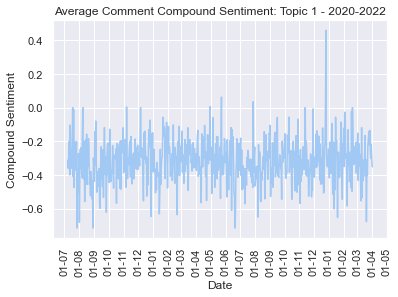

(-10.697492733089733, 3.5934211828655096e-19, 4, 627, {'1%': -3.440822526288827, '5%': -2.8661606613087542, '10%': -2.5692307337540603}, -738.7671597026379)
-0.3158173714104576


In [123]:
print(topic_0_df["compound"])
plot = sns.lineplot(x="date", y="compound", data=topic_0_df)
plt.xticks(rotation=90)
plt.title('Average Comment Compound Sentiment: Topic 1 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_0_df["compound"]))
print(mean(topic_0_df["compound"]))

0     -0.347986
1     -0.390744
2     -0.244425
3     -0.276300
4     -0.245163
         ...   
653   -0.127311
654   -0.217853
655   -0.245475
656   -0.418439
657   -0.259525
Name: compound, Length: 658, dtype: float64


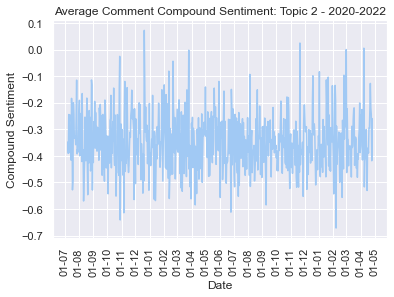

(-25.854717136397817, 0.0, 0, 657, {'1%': -3.440342440623255, '5%': -2.8659491890487026, '10%': -2.569118060113657}, -1028.417586748659)
-0.34551430995065263


In [124]:
print(topic_1_df["compound"])
plot = sns.lineplot(x="date", y="compound", data=topic_1_df)
plt.xticks(rotation=90)
plt.title('Average Comment Compound Sentiment: Topic 2 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_1_df["compound"]))
print(mean(topic_1_df["compound"]))

0     -0.160367
1      0.000000
2     -0.217964
3     -0.149850
4      0.000000
         ...   
507   -0.477000
508   -0.199800
509   -0.500650
510    0.000000
511   -0.166320
Name: compound, Length: 512, dtype: float64


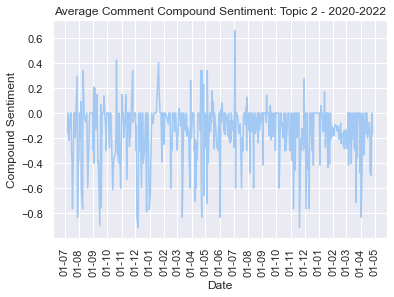

(-22.11169552017725, 0.0, 0, 511, {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}, -95.10778954934915)
-0.13883144376562087


In [125]:
print(topic_2_df["compound"])
plot = sns.lineplot(x="date", y="compound", data=topic_2_df)
plt.xticks(rotation=90)
plt.title('Average Comment Compound Sentiment: Topic 2 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_2_df["compound"]))
print(mean(topic_2_df["compound"]))